In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [11]:
#Creación del dataframe
datos = pd.read_csv(filepath_or_buffer = "/Users/ninoj/Downloads/samsung.csv", sep=',', low_memory=False)
datos.head()

,Date,Close,Volume
0,02/01/2008,10880,18047200
1,03/01/2008,10920,19346500
2,04/01/2008,10780,17997350
3,07/01/2008,10380,39787200
4,08/01/2008,10320,24783700


In [12]:
features = datos[['Close', 'Volume']]  # Seleccionamos las columnas de interés
scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(features)

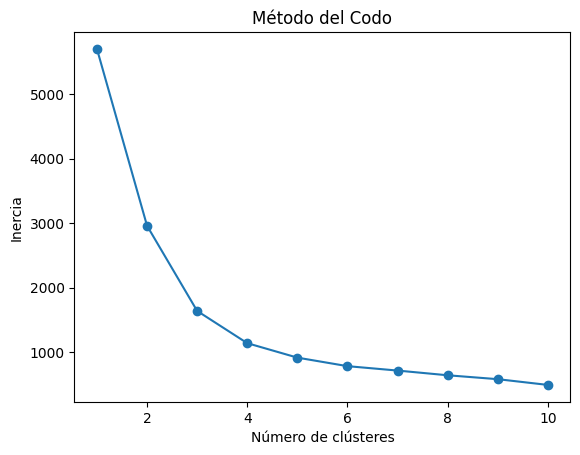

In [13]:
# Determinar el número de clústeres usando el método del codo
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.show()


In [14]:
# Elegir k = 3 para el ejemplo, ya que es donde la inercia comienza a estabilizarse
kmeans = KMeans(n_clusters=3, random_state=42)
datos['Cluster'] = kmeans.fit_predict(features_scaled)

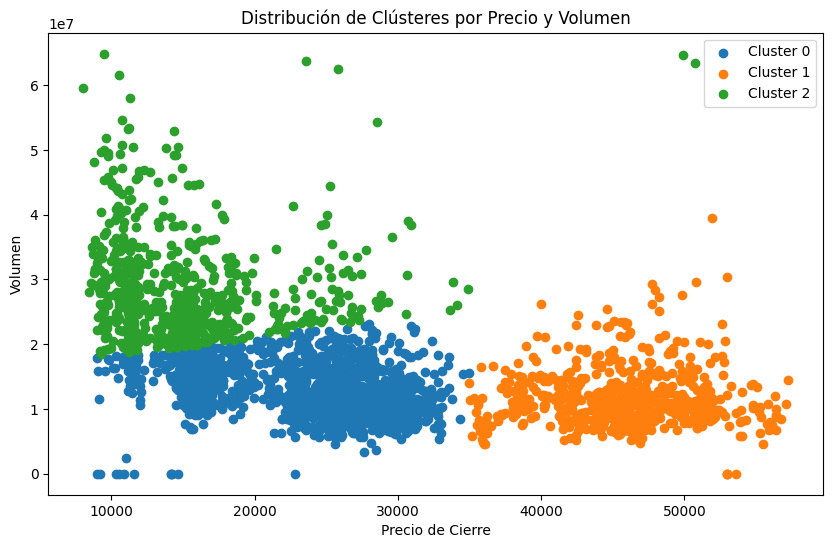

In [15]:
# Gráfico 2D de los clústeres
plt.figure(figsize=(10, 6))
for i in range(3):
    cluster_data = datos[datos['Cluster'] == i]
    plt.scatter(cluster_data['Close'], cluster_data['Volume'], label=f'Cluster {i}')
plt.xlabel('Precio de Cierre')
plt.ylabel('Volumen')
plt.title('Distribución de Clústeres por Precio y Volumen')
plt.legend()
plt.show()

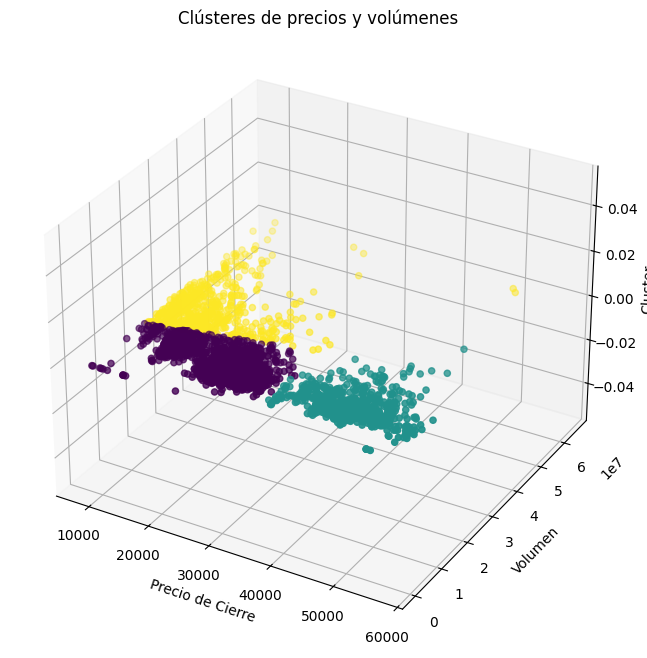

In [16]:
# Gráfico 3D de los clústeres
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datos['Close'], datos['Volume'], c=datos['Cluster'], cmap='viridis')
ax.set_xlabel('Precio de Cierre')
ax.set_ylabel('Volumen')
ax.set_zlabel('Cluster')
plt.title('Clústeres de precios y volúmenes')
plt.show()

In [17]:
# Evaluación con el índice de silueta
silhouette_avg = silhouette_score(features_scaled, datos['Cluster'])
print(f'Índice de Silueta: {silhouette_avg}')

Índice de Silueta: 0.5012589684919375


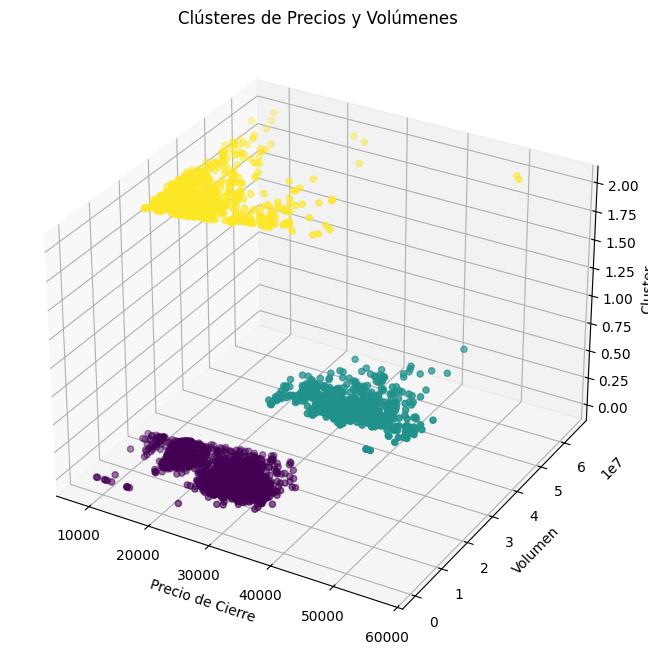

In [18]:
# Gráfico 3D de los clústeres (con tres características: Close, Volume y Cluster)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datos['Close'], datos['Volume'], datos['Cluster'], c=datos['Cluster'], cmap='viridis')
ax.set_xlabel('Precio de Cierre')
ax.set_ylabel('Volumen')
ax.set_zlabel('Cluster')
ax.set_title('Clústeres de Precios y Volúmenes')
plt.show()

In [19]:
# Mostrar los primeros dos componentes principales con escalamiento
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])

In [20]:
# Transformación de los datos con PCA
Xt = pipe.fit_transform(features)

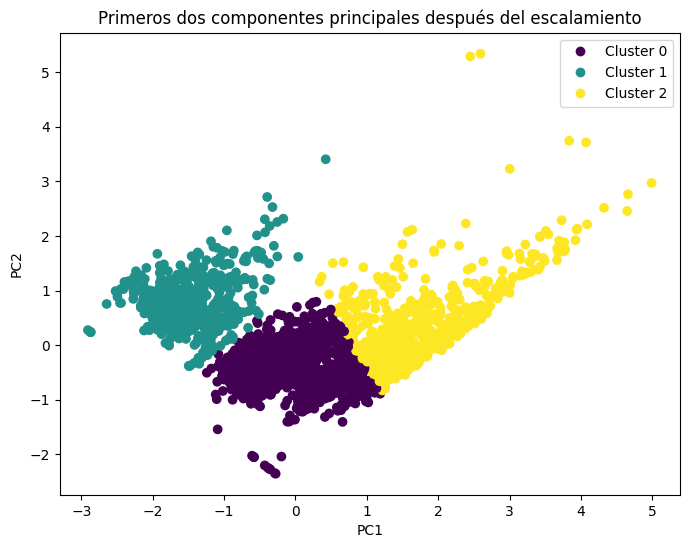

In [24]:
# Gráfico de los primeros dos componentes principales con escalamiento
plt.figure(figsize=(8, 6))
plot = plt.scatter(Xt[:, 0], Xt[:, 1], c=datos['Cluster'])
plt.legend(handles=plot.legend_elements()[0], labels=[f'Cluster {i}' for i in range(3)])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Primeros dos componentes principales después del escalamiento")
plt.show()

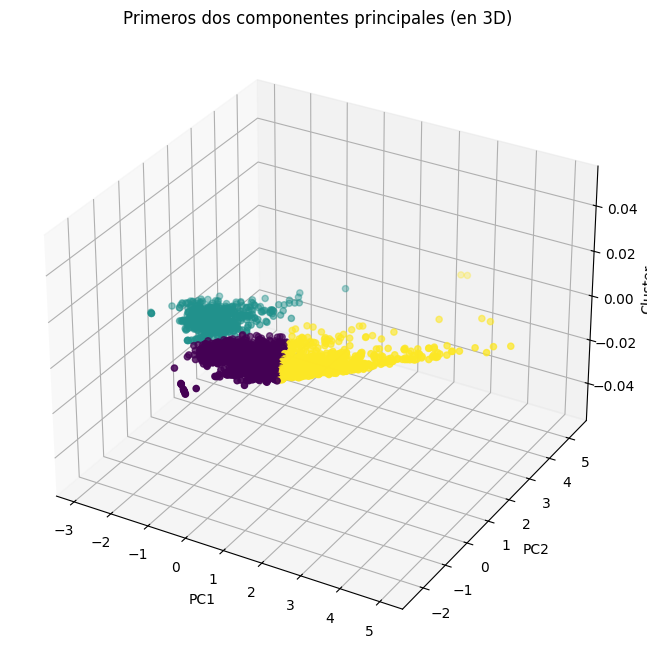

In [26]:
# Mostrar los primeros dos componentes principales con escalamiento
pca = PCA(n_components=2)  # Usamos 2 componentes principales, ya que solo tenemos 2 características
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])

# Transformación de los datos con PCA
Xt = pipe.fit_transform(features)



# Si quisieras graficar los 2 primeros componentes (en 3D)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xt[:, 0], Xt[:, 1], c=datos['Cluster'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Cluster')
ax.set_title("Primeros dos componentes principales (en 3D)")
plt.show()
